In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv


In [2]:
df=pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df=df.drop(columns=['RowNumber','CustomerId','Surname'])

In [7]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
df=pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [11]:
# splitting data into dependent and independent variables
X=df.drop(columns=['Exited'])
y=df['Exited']

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=99)

In [12]:
# scaling data for fast convergence
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

x_train_scaled= sc.fit_transform(X_train)
x_test_scaled= sc.fit_transform(X_test)

In [13]:
# importing necessary libraries to form ANN
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [14]:
# building ANN model

model=Sequential()

model.add(Dense(11,activation='relu', input_dim=11))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 5)                 60        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 198 (792.00 Byte)
Trainable params: 198 (792.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
history=model.fit(x_train_scaled, y_train, batch_size=50, epochs=100, validation_split=0.2, verbose=1)

Epoch 1/100
128/128 [==============================] - 1s 4ms/step - loss: 0.6307 - accuracy: 0.6381 - val_loss: 0.4997 - val_accuracy: 0.8006
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4831 - accuracy: 0.7967 - val_loss: 0.4529 - val_accuracy: 0.8037
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4529 - accuracy: 0.8005 - val_loss: 0.4316 - val_accuracy: 0.8119
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.8095 - val_loss: 0.4201 - val_accuracy: 0.8213
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4276 - accuracy: 0.8163 - val_loss: 0.4131 - val_accuracy: 0.8244
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.4203 - accuracy: 0.8177 - val_loss: 0.4078 - val_accuracy: 0.8275
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.4136 - accuracy: 0.8231 - val_loss: 0.4022 - val_accuracy: 0.8281

In [18]:
y_pred=model.predict(x_test_scaled)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0.19864036],
       [0.00225702],
       [0.03505341],
       ...,
       [0.04570019],
       [0.9035452 ],
       [0.8798586 ]], dtype=float32)

In [19]:
y_pred=y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7885

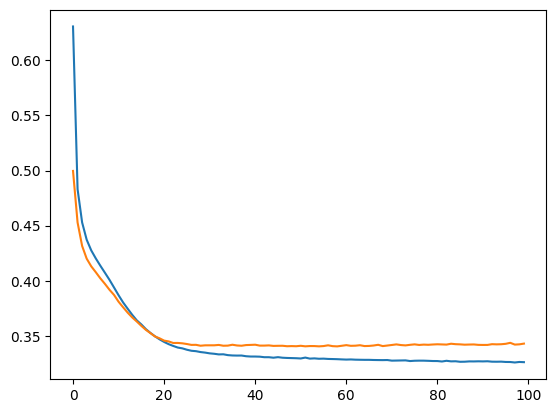

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

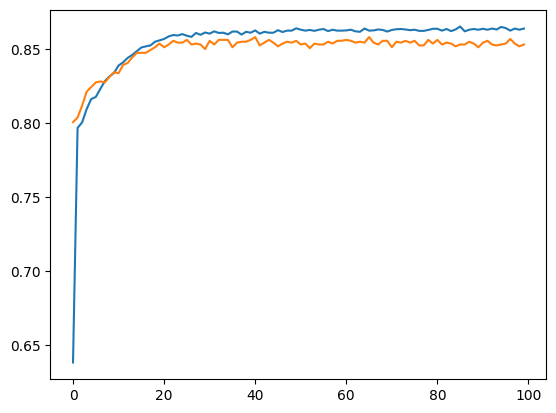

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])